In [39]:
import pandas as pd
import numpy as np
from math import sqrt
from scipy import stats
from scipy.stats import t as t_student
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [40]:
def generate_normal_random_values(count, min_val, max_val):
    mn = (max_val - min_val) / 2

    X = np.random.normal(loc=mn, scale=mn/3, size=count)
    X = np.clip(X, min_val, max_val)

    return X

In [41]:
def treat_values(values):
    values = [round(x, ndigits=2) for x in values]
    values = np.array(values)
    return values

In [42]:
def statistics(values):
    # Informações importantes sobre o conjunto de valores

    media = np.mean(values)
    var = np.var(values)
    dp = np.std(values)
    cont = len(values)

    return media, var, dp, cont

In [52]:
def decrease_value(x):
    return x - round(np.random.uniform(0, 10), 2)

In [53]:
def increase_value(x):
    return x + round(np.random.uniform(0, 10), 2)

In [54]:
def modify_sample(array):
    newArray = array.copy()
    for i in range(len(newArray)):
        if random.random() < 0.5:
            newArray[i] = decrease_value(newArray[i])
        else:
            newArray[i] = increase_value(newArray[i])
    return newArray

# Teste t-student para comparação de 2 médias populacionais a partir de 2 amostras aleatórias independentes

$$H_0: \mu_1 = \mu_2$$
$$H_1: \mu_1 \neq \mu_2$$


$$ Caso \space 1: \sigma_1^2 \neq \sigma_2^2 $$
$$ Caso \space 2: \sigma_1^2 = \sigma_2^2 $$

In [56]:
def tstudent_independentes(amostra1, amostra2, alpha):
  X1 = np.mean(amostra1)
  X2 = np.mean(amostra2)
  S1 = np.var(amostra1)
  S2 = np.var(amostra2)
  n1 = len(amostra1)
  n2 = len(amostra2)

  # CASO 1
  if S1 != S2:
    # segue distribuição tstudent ni
    Tcalc = (X1 - X2) / sqrt((((S1)**2)/n1) + (((S2)**2)/n2))

    ni = (((((S1)**2)/n1) + (((S2)**2)/n2))**2) / ((((((S1)**2)/n1)**2) / (n1 - 1)) + (((((S2)**2)/n2)**2) / (n2 - 1)))

    Tc = tabela_t_student[alpha].iloc[(ni)-1][0]

  # CASO 2
  elif S1 == S2:
    Sp = sqrt( ( ((n1 - 1) * (S1**2)) + ((n2 - 1) * (S2**2)) ) / (n1 + n2 - 2) )

    # segue distribuição tstudent n1+n2-2
    Tcalc = (X1 - X2) / Sp * sqrt((1/n1) + (1/n2))

    Tc = tabela_t_student[alpha].iloc[(n1+n2-2)-1][0]

# Teste t-student para comparação de 2 médias populacionais a partir de 2 amostras emparelhadas

$$H_0: \mu_d = 0$$
$$H_1: \mu_d \neq 0$$

In [66]:
def tstudent_emparelhadas(amostra1, amostra2, alpha, teste):
  n = len(amostra1)
  d = []
  for v in range(0,n):
    d.append(amostra2[v] - amostra1[v])

  d_media = sum(d)/n

  mu_d = np.mean(amostra2) - np.mean(amostra1)

  somatorio = 0
  for i in range(0,n):
    somatorio += (d[i] - d_media)**2

  Sd = sqrt((somatorio) / (n - 1))

  # segue distribuição tstudent ni - 1
  Tcalc = (d_media - mu_d) / (Sd/sqrt(n))
  Tc=0
  if teste == 'UNILATERAL':
    Tc = stats.t.ppf(1-alpha, n-1)

    if Tcalc > Tc:
      print("Não temos evidências para rejeitar H0")
    else:
      print("Temos evidências para rejeitar H0")


  elif teste == 'BILATERAL':
    Tc = stats.t.ppf(1-(alpha/2), n-1)

    if Tcalc > -Tc or Tcalc < Tc:
      print("Não temos evidências para rejeitar H0")
    else:
      print("Temos evidências para rejeitar H0")

  #print(d_media, mu_d, Sd, n)
  #plot = sns.boxplot([amostra1, amostra2], palette='Set2')

  #plot.set_ylim(2.8, 4)
  return Tcalc, Tc

In [67]:
# Exemplo

n = 10
alpha = 0.050
amostra1 = [3.2, 3.6, 3.4, 3.8, 3.4, 3.5, 3.7, 3.2, 3.5, 3.9]
amostra2 = [3.0, 3.3, 3.5, 3.6, 3.4, 3.3, 3.4, 3.0, 3.2, 3.6]
teste = 'BILATERAL'

tstudent_emparelhadas(amostra1, amostra2, alpha, teste)

Não temos evidências para rejeitar H0


(1.857488521969011e-14, 2.2621571628540993)

Não temos evidências para rejeitar H0
Não temos evidências para rejeitar H0
Temos evidências para rejeitar H0
Temos evidências para rejeitar H0
Temos evidências para rejeitar H0
Temos evidências para rejeitar H0
Não temos evidências para rejeitar H0
Não temos evidências para rejeitar H0
Não temos evidências para rejeitar H0
Não temos evidências para rejeitar H0
Não temos evidências para rejeitar H0
Não temos evidências para rejeitar H0
Não temos evidências para rejeitar H0
Temos evidências para rejeitar H0
Não temos evidências para rejeitar H0
Não temos evidências para rejeitar H0


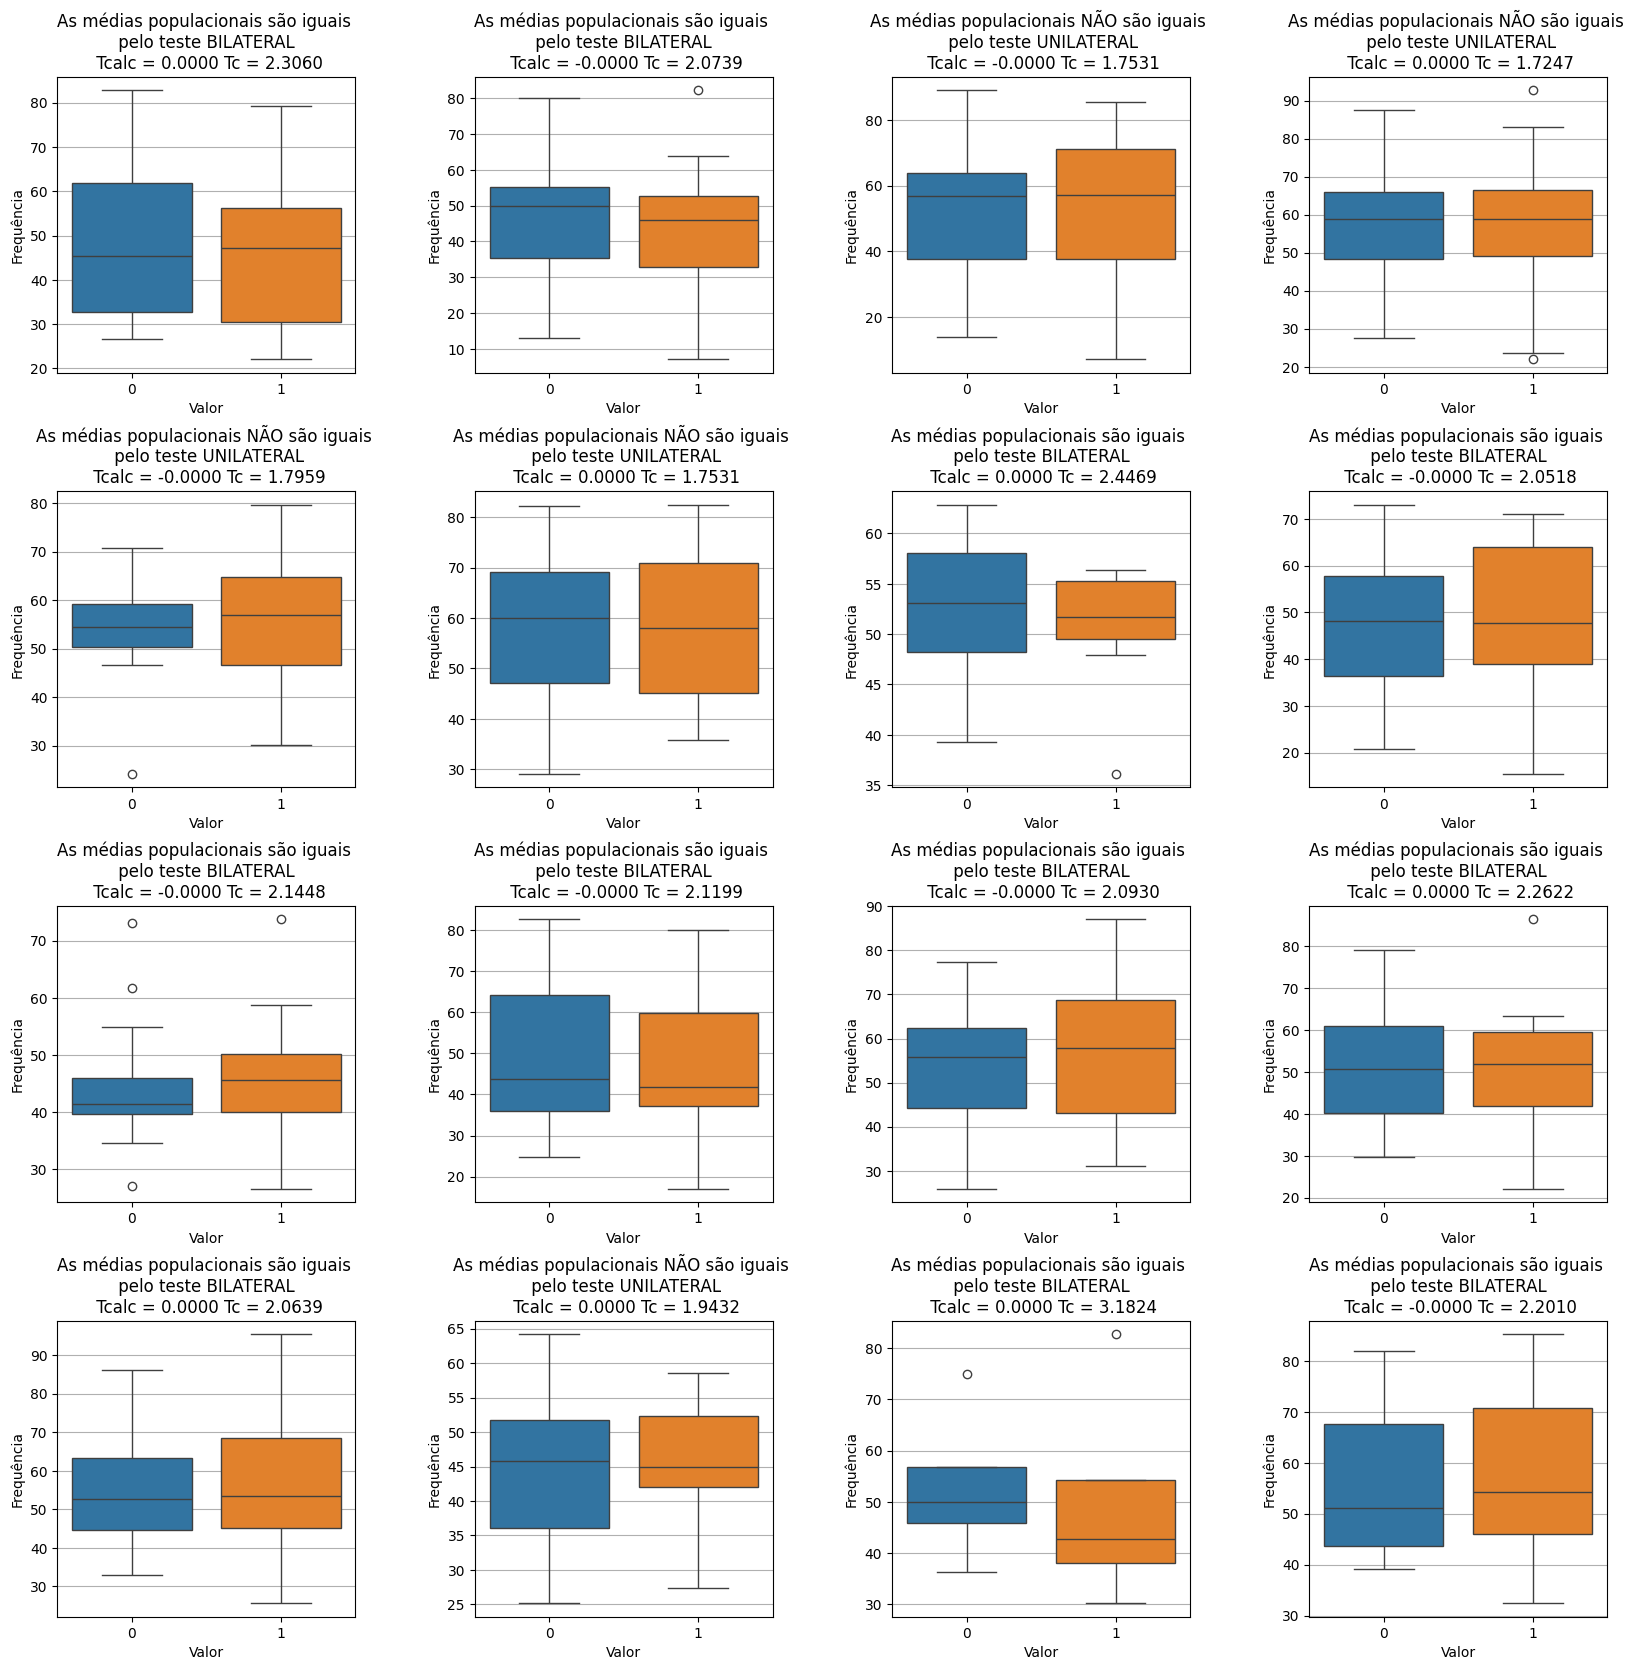

In [68]:
tipo = ['UNILATERAL', 'BILATERAL']
rdf = pd.DataFrame()
is_accepted = []
is_accepted_test = []

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for h in range(4):
  is_accepted_child = []
  is_accepted_test_child = []
  for j in range(4):
    amostra1 = treat_values(generate_normal_random_values(random.randint(4, 30), 0, 100))
    amostra2 = modify_sample(amostra1)

    media1, var1, dp1, n1 = statistics(amostra1)
    media2, var2, dp2, n2 = statistics(amostra2)

    teste = random.choice(tipo)
    alpha = 0.050

    Tcalc, Tc = tstudent_emparelhadas(amostra1, amostra2, alpha, teste)
    child = True

    if teste == 'UNILATERAL':

      if Tcalc > Tc:
        child = True
      else:
        child = False

    elif teste == 'BILATERAL':

      if Tcalc > -Tc or Tcalc < Tc:
        child = True
      else:
        child = False


    is_accepted_child.append(child)

    if(is_accepted_child[j]):
      axs[h][j].set_title(f'As médias populacionais são iguais \n pelo teste {teste} \n Tcalc = {Tcalc:.4f} Tc = {Tc:.4f}')
    else:
      axs[h][j].set_title(f'As médias populacionais NÃO são iguais \n pelo teste {teste}\n Tcalc = {Tcalc:.4f} Tc = {Tc:.4f}')

    axs[h][j].set_xlabel('Valor')
    axs[h][j].set_ylabel('Frequência')
    axs[h][j].grid(True)
    sns.boxplot([amostra1, amostra2], ax=axs[h][j])


    linha = {}
    linha['N amostral'] = n1
    linha['Média amostra 1 (antes)'] = media1
    linha['Média amostra 2 (depois)'] = media2
    linha['Desvio Padrão amostra 1'] = dp1
    linha['Desvio Padrão amostra 2'] = dp2
    linha['Tcalc'] = Tcalc
    linha['Tcritico'] = Tc
    linha['Teste'] = teste
    linha['Resultado'] = is_accepted_child[j]

    rdf = pd.concat([rdf, pd.DataFrame([linha])])

  is_accepted.append(is_accepted_child)
  is_accepted_test.append(is_accepted_test_child)

plt.show()